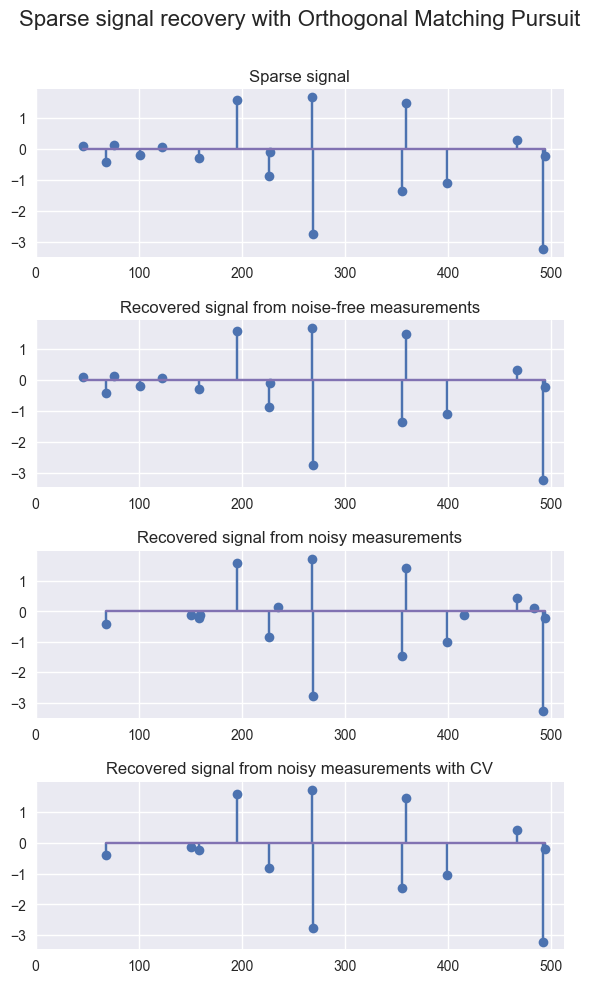

In [6]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入OMP模型
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
# 导入数据集生成工具
from sklearn.datasets import make_sparse_coded_signal
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 设置样本量和维度，（这里有点倒置了）
n_components, n_features = 512, 100
# 设置非零系数的个数
n_nonzero_coefs = 17
# 生成稀疏数据集
y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
    data_transposed=True,
)
# 非零值的下标
(idx,) = w.nonzero()
# 添加一些噪声
y_noisy = y + 0.05 * np.random.randn(len(y))
# 建立OMP模型
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
# 模型拟合，无噪声
omp.fit(X, y)
# 提取系数
coef1 = omp.coef_
# 提起系数的非零下标
(idx_r1,) = coef1.nonzero()
# 模型拟合有噪声
omp.fit(X, y_noisy)
coef2 = omp.coef_
(idx_r2,) = coef2.nonzero()
# 建立CVOMP模型
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef3 = omp_cv.coef_
(idx_r3,) = coef3.nonzero()
# 绘制真实系数图
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6,10))
axs[0].set_xlim(0, 512)
axs[0].set_title("Sparse signal")
axs[0].stem(idx, w[idx])
axs[1].set_xlim(0, 512)
axs[1].set_title("Recovered signal from noise-free measurements")
axs[1].stem(idx_r1, coef1[idx_r1])
axs[2].set_xlim(0, 512)
axs[2].set_title("Recovered signal from noisy measurements")
axs[2].stem(idx_r2, coef2[idx_r2])
axs[3].set_xlim(0, 512)
axs[3].set_title("Recovered signal from noisy measurements with CV")
axs[3].stem(idx_r3, coef3[idx_r3])
plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()
fig.savefig("../codeimage/code22.pdf")
